# Data Science Online
## Part V: Categorizing Data

<img src="images/ab_test.PNG" style="width: 900px; height: 250px;" />


### Table of Contents

1 - [Tables II: Categorizing Data](#section1)<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; a - [Groups](#subsection1a)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; b - [Visualization: Bar Plots](#subsection1b)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; c - [Pivots](#subsection1c)




In [17]:
# dependencies
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#from scripts.exec_ed_scripts import *

plt.style.use('fivethirtyeight')

In the previous notebook, we learned some basic Python and Table operations and applied them to the Rocket Fuel data to answer questions about the profitability of the ad campaign. 

Here, we'll build on those previous skills to dive deeper into the Rocket Fuel case. We'll explore questions including:

- How did conversions relate to different *hours of the day* and *days of the week*?
- How did the *total number of ads seen* relate to how often users converted?
- Was the difference in conversion proportions between the experimental and control groups *statistically significant*?

To answer these questions, we'll need to know a few additional Table operations.

# 1. Tables II: Categorizing Data <a id='section1'></a>

As a reminder, our data looks like this:

In [2]:
# load the rocket fuel data
ads = pd.read_csv('https://raw.githubusercontent.com/ds-modules/exec_ed/master/data/rocketfuel_data_renamed.csv', index_col=0)

# display the first ten rows
ads.head()

,test group,converted,total ads,most ads day,most ads hour
user id,,,,,
1069124,ad,0,130,1:Mon,20
1119715,ad,0,93,2:Tues,22
1144181,ad,0,21,2:Tues,18
1435133,ad,0,355,2:Tues,10
1015700,ad,0,276,5:Fri,14


This Table shows the conversion behavior of each user in the study. But, we're not interested in individual user behavior right now- we want to know the behavior of *all users in a specific category*, like everyone who saw the most ads on a Monday, or everyone who saw 200 ads in total.

In this section, we'll talk about:
1. The definition of **categorical data**
2. How to use Table functions to **group data into categories**
3. Using **visualizations** to view and compare categories



Let's say we have data about some of the handbags TaskBella sells, including the color, price, and rating for each collected from different stores.

In [3]:
# create the example handbag data Table
handbags = pd.DataFrame(data={"color":["black", "red", "red", "brown", "black"],
                               "price":[115.99, 130, 124.95, 144.99, 120.05],
                               "rating":[4, 4, 5, 3, 4]})
handbags

,color,price,rating
0,black,115.99,4
1,red,130.00,4
2,red,124.95,5
3,brown,144.99,3
4,black,120.05,4


#### Data Types: Numerical and Categorical
This table has two different types of data: **numerical** and **categorical**.

Price and rating are **numerical**: they have numbers for values, and we can order those values along a scale from least to most.

Color is **categorial**: it has strings (text) for values, and those values can't really be ordered from least to most.

The type of data affects the kind of analysis we can do, in addition to how we visualize it. For now, we're going to focus on categorical data.



### 1a. Groups <a id='subsection1a'></a>

A question we might ask is how price or rating is different for different categories of color. To conduct this analysis, we want to do something like this:

1. Find all the possible colors
2. Sort all the rows of the Table into groups, one for each unique color
3. Return a new Table with one row for each color and information about that color of bag

To use `group`, call it on a Table using dot notation and specify which column you want to group on as the argument.

In [5]:
# group by handbag color
handbags.groupby("color").count()

,price,rating
color,,
black,2,2
brown,1,1
red,2,2


By default, `group` gives back a two-column Table where the first column contains all the unique colors (the column we grouped by) and the second column gives the counts of how many handbags had each color.

<br/>
<div class="alert-warning">
    <b>EXERCISE:</b> Use `group` to group the handbags by `"rating"`.
    <div>

In [ ]:
# group by rating
handbags.groupby(...).count()

We can also ask `group` to tell us different things about the different color handbags by specifying a `collect` function. The `collect` function specifies what we want to know about the price and rating for each color of handbag.

For example, if we want to know the average price and average rating of each color of handbag, we can add `np.average` as an argument.

In [7]:
# get average price and rating per color
bag_avgs = handbags.groupby("color").mean()
bag_avgs

,price,rating
color,,
black,118.020,4.0
brown,144.990,3.0
red,127.475,4.5


A picture might help to understand what just happened.

<img src="images/group_ex.png" style="width: 1000px; height: 400px;" />

<br/>

<div class="class alert-warning">
<b>EXERCISE:</b> You can set `collect` to be a wide variety of reduction functions, including built-in functions `sum`, `min`, and `max`, or functions from the Numpy array package `np.mean`, and `np.median`.

Using `group`, group the handbags by color and find the minimum price and rating for each group.
</div>

In [ ]:
# fill in the ... with the correct code
handbags.groupby(...).average()

You can also group by multiple columns. Multiple columns are given to `group` in a **list**. A list is a sequence of data, similar to an array. Lists hold data between two square brackets, separated by commas. The resulting Table will have one row for each *combination* of unique values in the two columns. 

For example, when we group by handbag color and rating we get 4 rows:
- one for brown bags, since there's only one brown bag
- one for black bags, since both black bags have the same rating
- two for red bags, since each red bag has a different rating

In [10]:
# group by color and rating
handbags.groupby(["color", "rating"]).mean()

price
color rating        
black 4       118.02
brown 3       144.99
red   4       130.00
      5       124.95

<div class="alert alert-info">
**Collection functions and data types:**
The collect function you use must also work on the type of data in your rows for each group. For example, if you try to reduce using `np.average` to get the average value and your rows include text data, you will get an error since the computer doesn't know how to take the average of a word.*

</div>

### 1b. Visualization: Bar Plots <a id="subsection1b"></a>

Tables provide great ways to organize and display data. But as data sets grow very large (i.e. thousands, tens of thousands, even millions of rows), it becomes harder and harder to understand what's going on with the data just by looking at it in a table.

*Visualizations* are helpful to:
- get a big-picture understanding of a data set
- compare two or more variables
- find the variance of a variable

and much more.

Let's look again at the table we just made containing the average price and rating for each color.

In [11]:
bag_avgs

,price,rating
color,,
black,118.020,4.0
brown,144.990,3.0
red,127.475,4.5


One of the best ways to visualize categorical data is with a **bar plot**. Bar plots allow us to compare multiple categories within the same plot. 

Tables have a method to make horizontal bar plots called `barh`. `barh` takes two arguments: the name of the column with the categories, and the name of the numerical variable you want to visualize.

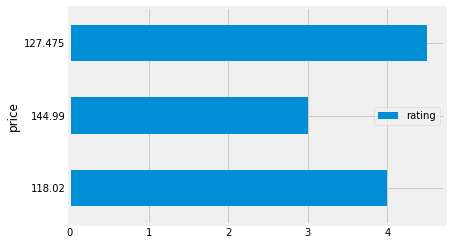

In [25]:
# create a bar plot of color versus average price
%matplotlib inline
bag_avgs.plot.barh("price")


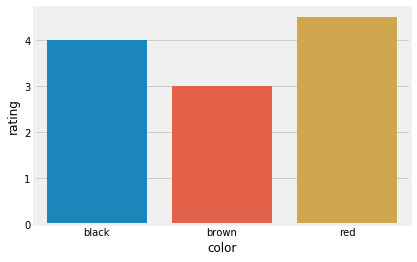

In [28]:
import seaborn as sns
sns.barplot(x="color", y="rating", data=bag_avgs.reset_index())

Each cateogory is listed on the vertical axis and represented by a bar. The length of each bar is the average price.

### 1c. Pivots <a id="subsection1c"></a>
In the last example, we grouped by two features- color and rating- and the first two rows in the table we got back represented each color-rating category. We noticed that it included only the color-rating categories that were found in the data: for example, there was no "brown-5" row because no brown handbag in our data was rated a 5.

Sometimes it's easier to visualize category combinations using a **pivot table**. A pivot table is a reorganization of a two-category group table. Instead of having one row for each color-rating category, there is one column for each color and one row for each rating. The call expression looks like:

`table_name.pivot("variable for columns", "variable for rows")`

In [33]:
# make a pivot table for color and rating
handbags.pivot("color", "rating")

,color,price,rating
0,black,115.99,4
1,red,130.00,4
2,red,124.95,5
3,brown,144.99,3
4,black,120.05,4


Just like for `group`, by default `pivot` collects the counts of each color-rating pair. Also like with `group`, we can specify a different `collect` function, like `np.median` or `sum`. 

If we give a different `collect` function, we will also need to give an argument called `values`. This tells the computer which column we want to use as the basis for the values in our table.

The following code gives an example of a pivot table that shows rating-color pairs, with maximum prices for each pair as the values.

In [ ]:
# make a pivot table for color and rating that gets the maximum prices
handbags.pivot(columns="color", rows="rating", values="price", collect=max)

<div class="alert-warning">
<b>EXERCISE:</b> Make a pivot table with the following specifications:
- the *columns* are the different ratings
- the rows are the different colors
- the values are the average prices (hint: use `np.average` as your collect function)
    </div>

In [ ]:
# fill in the ...
handbags.pivot(columns=..., rows=..., values=..., collect=...)

# 2. Application: Rocket  Fuel by Day and Time <a id="section2"></a>

### 2a. Example: Consumer Response vs. Day of Week <a id="subsection2a"></a>

Let's answer the question of how *conversions* changed on  *different days of the week* for the *different test groups*. 

Remember, our `ads` data looks like this:

In [ ]:
# Rocket Fuel advertising data
ads

#### Conversion Rate vs. Day of Week
Let's start with a slightly simpler problem: comparing the *average rate of conversion* for different days of the week (regardless of test group). 

First, we select the columns we need.

In [ ]:
# select only the columns with day and conversion info
ads_day_simple = ads.select("most ads day", "converted")
ads_day_simple

Then, we group by day. For our collection function, we want to calculate the conversion rate. Because the conversion rate is just the number of people who converted divided by the total number of people, and because `"converted"` is equal to 1 only when a person converted, we can get the conversion rate by taking the average of `"converted"`.

In [ ]:
day_rates = ads_day_simple.group("most ads day", collect=np.average)
day_rates

Finally, we can look at the values in a bar graph.

In [ ]:
day_rates.barh('most ads day')

#### Conversion Rate vs Day of Week and Test Group

Now, we want to return to our original question: how does conversion rate differ between different days of the week for the two different test groups? 

To answer our question, we only need to know three pieces of information: which test group a user was in, the day on which they saw the most ads, and whether or note they converted. We'll use a table transformation function to select only the three columns we need.

In [ ]:
# table with only the three relevant columns
ads_day = ads.select("test group", "converted", "most ads day")
ads_day

Next, we'll need to apply `pivot` so we can have one set of categories as the rows and the other set of categories as the columns. Our call to `pivot` can be broken down like this:

1. The first two arguments give the two sets of categories: "test group" and "most ads day"
2. The values will be calculated from "converted"
3. Our collection function will be `np.average` to calculate the rate at which each day-test group pair converted.

In [ ]:
# create a pivot table for days and test groups
days_pivot = ads_day.pivot("test group", "most ads day", values="converted", collect=np.average)
days_pivot

Then, we can visualize our findings in a bar plot. The `barh` function gets `most ads day` as the argument since that's the one column in our table that still contains categorical data.

In [ ]:
days_pivot.barh("most ads day") 

<div class="alert-warning">
    <b>QUESTION:</b> On which days is advertising the most effective? When is it least effective? What are some possible limitations to the conclusions we can draw from this graph?
    </div>

**ANSWER:** 

### 2b. EXERCISE: Consumer Response vs Hour of Day <a id="subsection2b"></a>
Next, we want to see how the conversion rate does or does not changes for each test group by *time of day*.

The process will be almost identical to that in 2a for comparing consumer response to day of the week, with any references to day of week changed to hour of day. Try walking through the process step-by-step, and refer to 2a for guidance as needed.

Start by creating the Table `ads_hour` that contains the three columns we need from `ads`: `"most ads hour"`, `"test group"` and `"converted"`.

In [ ]:
# table with only the three relevant columns
ads_hour = ads.select(...)
ads_hour

Then, create a pivot table by calling the `pivot` function. Your pivot table should be set up like this:
1. The columns of the pivot table should be the two *test groups* in `"test group"`
2. The rows of the pivot table should be the different *hours* in `"most ads hour"`
3. The values will be calculated from `"converted"`
4. The function collecting the values should be `np.average`

Check the code used to create the pivot table in section 2a for some hints about how to structure the call expression.

In [ ]:
# create a pivot table for days and test groups
hour_pivot = ads_hour.pivot(..., ..., values=..., collect=...)
hour_pivot

Finally, create a horizontal bar graph by calling `barh` on your `hour_pivot` pivot table. Remember: the argument given to `barh` is the name of the column with the different categories we want to compare (in this case, the categories are the hours).

In [ ]:
# make a bar plot
...

# 3. Application: Rocket Fuel and Total Ads <a id="section3"></a>

One final question we want to explore is how the *total number of ads* a user saw relates to how *likely they were to convert*. 

The "total ads" variable is a little different from the other variables we've grouped by so far. The days of the week and the hours of the day are coded as numbers, but they act a bit like categorical data in some ways. 

- They have very limited possible values (1-7 for days of week, 0-23 for hours of day)
- We can put them in order to some extent (day 1: Monday comes before day 2: Tuesday), but the ordering breaks down for the first and last values (day 7: Sunday comes before day 1: Monday)

In contrast, the count of total ads is definitely *numerical data*. "Total ads" can take on many, many values and we can unequivically say that one total ad value is greater or less than another. 

In this section, we'll talk a bit about ways to visualize numerical data, as well as how (and why) to treat numerical data as categorical for analysis.

### 3a. Histograms <a id="subsection3a"></a>

A *histogram* is a visualization useful for numerical data. It shows the *distribution* of the values in a column of numerical data: that is, it shows all the different possible values and how often those values occur.

Histograms are constructed using the `hist` method. As an example, here's the histogram of the variable "most ads hour", which gives the hours of the day when users saw the most ads.

In [ ]:
# histogram of the hour of day variable
ads.hist("most ads hour", unit="hour")

The horizontal axis gives the different possible hours of the day. The axis is divided into **bins**: intervals that contain one or more possible values. For instance, a narrow bin could hold all users that saw the most ads in hour 7, and a wider bin could encompass all users that saw the most ads in hour 7, 8, or 9.

The height of the bar says what percentage of the users fell into the corresponding bin. So, a tall bar means that lots of users saw most of their ads during that bin's hour-of-day interval.

This histogram shows us that most users saw the most ads around hour 15 (3PM) and very few users saw many ads between hour 0 (midnight) and hour 6 (6 AM).

<br/>
<div class="alert-warning">
    <b>EXERCISE:</b> Use `hist` to create the histogram for the "total ads" column in the `ads` table. What does the histogram tell us about the distribution of "total ads"?
    </div>

In [ ]:
# create a histogram of the distribution of total ads seen
...

### 3b. Consumer Response vs. Total Ads Seen <a id="subsection3b"></a>

We want to answer the question of how the *total number of ads seen* relates to the average *conversion rate*. 

We'll start the same way as we did to answer our questions about day of week and hour of day: create a new table with only the columns from `ads` that we will need for this question.

In [ ]:
# from ads, select total ads, test group, and converted
ads_tot = ads.select("total ads", "test group", "converted")
ads_tot

<div class="alert-warning">
    <b>EXERCISE:</b> From our histogram in 3a, we can see that while some users saw as many as 2000+ ads total, almost all users saw between 1 and about 200 ads. To avoid skewing our analysis by including conversion rates for very rare "total ads" counts, let's select only the rows where there are less than 211 ads.

Hint: use the `where` function with the predicate `are.below`
</div>

In [ ]:
# use where to get rows that saw less than 211 ads
ads_small = ads_tot.where(..., ...)
ads_small

"total ads" is now restricted to 210 possible values- much less than the original range. Let's try redrawing the histogram.

In [ ]:
# create a histogram for the distribution of total ads
ads_small.hist("total ads")

The large majority of the values are still concentrated on the low end of the possible values, but we've reduced the *skew* a bit- you can now actually see the bars on the right side of the histogram. 

The histogram also gives us clues for how to visualize our "average conversion rates per test group and total ads count" we want to answer our question. Since some values of total ads are pretty rare, we will want to group similar "total value" counts together and calculate the average conversion rate for the group, rather than for each individual count. 

Note that this also seems like a reasonable assumption: we assume that someone who saw 147 ads will behave similarly to someone who saw 145 or 149.

We can make the numerical "total ads" into categorical ranges of total ad counts with a function called `change_to_range` that takes in a number and outputs a range containing that number. `apply` is a Table function that will apply `change_to_range` to each value in the "total ads" column.

In [ ]:
# run this cell, but don't worry too much about the details of the code
total_ad_range = ads_small.apply(change_to_range, "total ads")
ads_small.append_column('total ads', total_ad_range)
ads_small

You'll notice that each range starts with a letter: that's just to make it easy for the computer to sort the ranges from lowest to highest.

<br/>

<div class="alert-warning">
    <b>EXERCISE:</b> Now, we want to create a pivot table where the columns are the test groups, the rows are the total ads, and the values are calculated from "converted" and collected using `np.average`.
    </div>

In [ ]:
# create a pivot table for total ads vs test group
total_pivot =ads_small.pivot(columns=..., rows=..., values=..., collect= ...)
total_pivot


Finally, use `barh` to create a bar plot of the data in `total_pivot`. The total ad ranges should be on the vertical axis.

In [ ]:
# create a horizontal bar plot with total ad ranges as the categories
total_pivot.barh(...)

<div class="alert-warning">
    <b>QUESTION:</b> What can you infer from the plot? In what region is advertising most effective?
    </div>

**ANSWER:**

<div class="alert-warning">
    <b>QUESTION:</b> What do the above figures imply for the design of the next campaign assuming that consumer response would be similar?
    </div>

**ANSWER:** 

## 4. Example: Rocket Fuel A/B Test <a id="section4"></a>

Rocket Fuel's initial goal was to say whether or not the advertising campaign they ran for TaskBella was effective. In Notebook 01, we started to answer this question by calculating the *difference in average rates of conversion* between the control (PSA) group and the test (ad) group. However, we don't yet know if that difference is *statistically significant*. 

This section will show how to get a measure of statistical significance in Python, including how to:

- use **randomization** for hypothesis testing
- run a **permutation test** to see if the observed results of an A/B test are significant
- calculate the **p-value** and **standard error**


The code to calculate the difference is replicated below, in compressed form. Run next two cells to output the two rates and the difference between them.

In [ ]:
# the test groups and conversion data
ab_test = ads.select("test group", "converted")
ab_test

In [ ]:
# a Table with the conversion rates for the ad and psa groups
convert_rates = ab_test.group("test group", np.average)

# an array with the two conversion rates
rates = convert_rates.column("converted average")

# the difference between the average ad and psa rates
observed_diff = rates[0] - rates[1]
observed_diff

We can see that there is a difference, but that difference is very small. What we now what to know is whether that difference is *significant*. Can the difference between the two rates be explained by chance variation? Or, is the difference too large to be likely under chance variation, providing evidence that the ad campaign was effective in increasing bag purchases?

Our hyptheses are as follows:

- **Null hypothesis:** users who saw ads were just as likely to purchase a handbag as users who saw PSAs. Any difference in the conversion rates seen in the sample data is due to random chance.

- **Alternative hypothesis:** users who saw ads were more likely to buy handbags than users who saw PSAs.

### 4a. Permutation <a id="subsection4a"></a>

If we assume the null hypothesis, then any user had the same chance of converting as any other, regardless of whether or not they saw the ad. This means that if we took all the values from the "converted" column and randomly reassigned them to all the users in the study (both control and experimental group members), we should see a similar difference in conversion rates between the two groups.

The `sample` function can help us out with the random reassignment. Let's look at an ordered table of the numbers 1 through 10.

In [ ]:
# a table of numbers
numbers = Table().with_column("numbers", np.arange(1, 11))
numbers

When we call `sample` on the table, it returns a random sample of rows from the original table. This sample is the same size as the original table by default.

In [ ]:
# take a random sample
numbers.sample()

If you run the cell a few times, you'll notice that the sample can contain the same value more than once. That's because `sample` samples **with replacement** by default: it picks each row in the new table out of *all* the rows in the old table with equal probability. 

In this case we want to sample **without replacement**, which will return all the same rows as the original table in a different order. To do this, we set the optional argument `with_replacement` to `False`.

In [ ]:
numbers.sample(with_replacement=False)

Now we can get a permutation of the values in "converted".

In [ ]:
# creates a table with only the values in "converted".
converted = ads.select("converted")
permutation = converted.sample(with_replacement=False)
permutation

We then want to attach this column of shuffled values to our original `ab_test` table

In [ ]:
ab_test = ab_test.with_column("converted permutation", permutation.column("converted"))
ab_test

Then, we group by "test group" again to see the conversion rates by group for the permutation.

In [ ]:
# group by test group
with_perm = ab_test.group("test group", collect=np.average)

# rename the columns to be more understandable
with_perm = with_perm.relabel(["converted average", "converted permutation average"],
                             ["conversion rate (original)", "conversion rate (permutation)"])
with_perm

And finally, we calculate the difference between the "ad" and "psa" group conversion rates for the permutation.

In [ ]:
# an array of the permutation rates
perm_rates = with_perm.column("conversion rate (permutation)")

# the difference between the permutation ad and psa group rates
perm_rate_diff = perm_rates[0] - perm_rates[1]

# print the original rate difference and the permutation rate difference
print("Observed conversion rate difference: ", observed_diff, 
     "\nPermutation conversion rate difference: ", perm_rate_diff)

<div class="alert-warning">
    <b>QUESTION:</b> How does the difference in conversion rates for the permuted data compare to the conversion rate difference we saw in the original observed sample? What might that imply regarding our hypotheses?
    </div>

**ANSWER:**

### 4b. Simulation <a id="subsection4b"></a>

Here we run into a problem similar to our original issue: how do we know that the difference seen in this new permutation is *also* not due to random chance?

One way is to repeat the process from section 1a- randomly permute the conversion data, attach it to the test group labels in their original order, and calulate the test statistic- many, many times. This will give us the **empirical distribution** of values for the **test statistic** (i.e. the difference between the two conversion rates). 

To simplify things, we've made a function that does all of code in part 1a. `calc_perm_rate_diff` randomly shuffles the values in "converted", groups them by test group, and returns the difference between the conversion rates for the two groups. Try running the cell a few different times to see what values it calculates.

In [ ]:
# calculate the test statistic for a random permutation
calc_perm_rate_diff()

#### `For` Loops

We want to calculate the test statistic many times, but ideally we want to do so without copying and pasting calls to `calc_perm_rate_diff` thousands of times.

Thankfully Python has a statement called a **`for` loop** that allows us to repeat an action or set of actions over and over again. Here's an example:

In [ ]:
# a for loop
for i in range(5):
    print("Hi there!")

We can break down a `for` loop statement (i.e. the second line in the above cell) into four parts:

- The word "for"
- A name we want to give each item in a sequence
- The word "in"
- A sequence (e.g. "range(5)" to go through numbers 0 up to but not including 5)

The `for` loop statement tells the computer to do all of the indented code below the statement (also called the code "inside" the loop), for each item in the sequence. So, if we want to calculate the test statistic for 1000 permutations of the "converted" data, we can put our calculcation function inside a `for` loop.

We want to be careful: unless we save the calculations somewhere outside the loop, the computer will just overwrite them each time it goes through the loop. The next cell creates a list called `diff_list` to store the differences we calculate and adds an extra command inside the `for` loop to add each difference to the list after it's calculated.

Run the next cell to calculate the test statistic for 1,000 permutations of the data. Note: this cell may take up to a minute to finish running (remember- the computer is working with almost 600,000 rows, and it's doing it 1,000 times).

In [ ]:
diff_array = make_array()

for i in range(1000):
    # calculate the rate difference
    diff = calc_perm_rate_diff()
    
    # add the difference to the array
    diff_array = np.append(diff_array, diff)
    
    # code to periodically print out a status update
    if i % 100 == 0:
        print("{}% done".format(i/10))
    elif i == 999:
        print("done!")


Now, let's put all the test statistics we calculated in a table.

In [ ]:
# table of calculated test statistics
differences = Table().with_column("rate difference", diff_array)
differences

And finally, we'll use `.hist` to visualize the empirical distribution of the test statistic in a histogram. We've increased the optional `bins` argument from the default value to see a bit more detail.

In [ ]:
# the empirical distribution of the test statistic
differences.hist("rate difference", bins=30)

We see that the distribution is roughly normal and centered around zero, which makes sense since our null hypothesis assumes that the control and experimental group conversion rates are the same, and the difference between two equal rates is zero.

Now, let's see where the rate difference we observed in the original sample falls compared to these rates. The following cell plots the histogram again and adds a vertical line at the value of the test statistic in the original sample.

In [ ]:
# plot the empirical histogram
differences.hist("rate difference", bins=30)

# plot the original sample statistic
plt.axvline(x=observed_diff)

### 4c. P-Values, T-Tests, and Standard Error <a id="subsection4c"></a>

Our original observed difference looks like it falls way outside all the the values in the empirical distribution. We can also note that our empirical distribution looks roughly normal- this makes sense by the [**Central Limit Theorem**](https://en.wikipedia.org/wiki/Central_limit_theorem) because our test statistic is an average.

We can get a measure of exactly how far outside it is by calculating the **p-value**. Remember, the p-value in this case is the chance that, under the null hypothesis, the average difference in conversion rates is the *as large or larger* than the difference we saw in our original sample.

<div class="alert alert-info">
    **Two-Tailed vs One-Tailed P Values**
    We are calculating the *one-tailed p value*: the chance that a rate difference average under the null is as large or larger than the observed difference. Many analyses instead calculate the [*two-tailed p value*](https://en.wikipedia.org/wiki/One-_and_two-tailed_tests) the chance that a rate difference average under the null is *as extreme or more extreme* than the observed difference, on either side of the empirical distribution (that is, as far from the mean both to the right and left). The one-tailed value is helpful here because we're interested in whether the average experimental rate was *significantly bigger* than the average control rate. If instead we wanted to know whether the two groups were *significantly different* (that is, the experimental rate was significantly bigger or smaller), we would use the two-sided p test.


</div> 

<br/>

<div class="alert-warning">
    <b>EXERCISE:</b> Calculate the empirical p-value.  
    <ol>
        <li>Create a Table `more_than_original` that contains all the rows of `differences` where `rate_difference` is greater than or equal to `observed_diff`. This code has been given.</li>
        <li>Get the count of items in the `more_than_original` Table and the count of items in the `differences` Table. Hint: the Table attribute `num_rows` is helpful- remember, it's called using dot notation and doesn't have parentheses after since it's an attribute, not a function.</li>
        <li>Divide `more_than_count` by `total_diffs_count` to get the empirical p-value.</li>
    </ol>
    </div>

In [ ]:
#  A Table of values in the empirical distribution that are at least as large as the observed rate difference
more_than_original = differences.where("rate difference", are.above_or_equal_to(observed_diff))

# the number of rows in more_than_original
more_than_count = ...
# the number of rows in differences
total_diffs_count = ...

# the empirical p value
empirical_p = ...
empirical_p

Because it is a common operation, the **Scipy** Python library for math, science, and engineering has a function that calculates the T-test for two independent samples. `ttest_ind` takes two arguments- the two arrays containing the samples from the two different groups- and returns the calculated T statistic and the two-sided p value.

The **T statistic** is similar to the **z score**, but used when the population parameters (like the standard deviation) are unknown.

Since our test statistic is normally distributed, the one-tailed p value should be half of the two-tailed.

In [ ]:
# divide our table into experiment and control groups
exper_group = ads.where("test group", are.equal_to("ad"))
control_group = ads.where("test group", are.equal_to("psa"))

# get the conversion data as arrays
exper_conversion = exper_group.column("converted")
control_conversion = control_group.column("converted")


# calculate the T-statistic and P-value for the 
ttest_ind(exper_group.column("converted"), control_group.column("converted"))

<div class="alert-warning">
    <b>QUESTION:</b> A statistically significant p value is conventionally defined as less than or equal to 0.05, and a highly significant p value is conventionally defined as less than or equal to 0.01. 
- Is the p-value we see significant? 
- Given the p-value *alone*, should we recommend that Taskbella should continue the ad campaign? If not, what other information (perhaps from the first notebook) would we need, and what should our recommendation be?
    </div>

**ANSWER:**

#### References

- Rocket Fuel data and discussion questions adapted from materials by Zsolt Katona and Brian Bell, BerkeleyHaas Case Series
- "For loop" section adapted from materials by Kelly Chen at [UC Berkeley Data Modules](https://github.com/ds-modules/core-resources)

Author: Keeley Takimoto